# PERCEPTRON

#### Christian Adriel Rodriguez Narvaez 
Date: 10/10/2023

### Objective 
This model begins by generating a random dataset. The data in this dataset represents the quality of various pieces, categorized into two groups: 'normal' and 'anomalies.' The primary goal of the perceptron is to assist in predicting whether new data points are considered 'normal' or 'anomalies 

In [1]:
import numpy as np

### DataSet

Creation of data set, using random function 

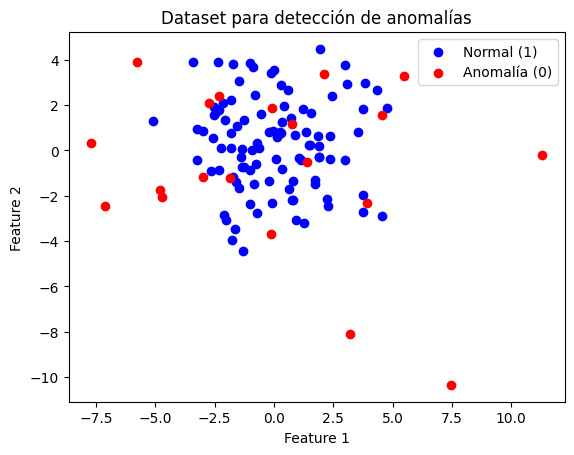

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de rendimiento normal (clase 1)
np.random.seed(0)
num_samples_normal = 100
normal_data = np.random.randn(num_samples_normal, 2) * 2

# Generar datos de anomalías (clase -1)
num_samples_anomalies = 20
anomaly_data = np.random.randn(num_samples_anomalies, 2) * 5

# Etiquetar los datos
labels_normal = np.ones(num_samples_normal)
labels_anomalies = -np.zeros(num_samples_anomalies)

# Visualizar el dataset
plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', label='Normal (1)')
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], color='red', label='Anomalía (0)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset para detección de anomalías')
plt.show()


# Concatenar los datos de rendimiento normal y anomalías
X = np.vstack((normal_data, anomaly_data))
y = np.hstack((labels_normal, labels_anomalies))


#### Pseudocode of the dataset creation 

1. Importar las librerías numpy y matplotlib.pyplot.

2. Establecer una semilla aleatoria con np.random.seed(0).

3. Definir el número de muestras para datos normales (num_samples_normal = 100) y para anomalías (num_samples_anomalies = 20).

4. Generar datos normales como una matriz 2D normalmente distribuida multiplicada por 2.

5. Generar datos de anomalías como una matriz 2D normalmente distribuida multiplicada por 5.

6. Etiquetar los datos normales con 1 y los datos de anomalías con -1.

7. Visualizar el conjunto de datos normal y de anomalías en un gráfico de dispersión con colores azul y rojo respectivamente. Etiquetar ejes y mostrar leyendas.

8. Concatenar los datos normales y de anomalías en una sola matriz X.

9. Concatenar las etiquetas de los datos normales y de anomalías en un solo arreglo y, que representa las etiquetas y.


### Perceptron 

Define the hyperparameters

In [31]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
# Define the function of training "Fit"        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)

        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (target - prediction)
                self.weights[1:] += update * xi
                self.weights[0] += update
#Prediction function will take the X values, and whithg the "np.where", we will create a condition depending if the total 
#sum meet the activation condition given for the heaviside 
    def predict(self, X):
        return np.where(np.dot(X, self.weights[1:]) + self.weights[0] >= 0.0, 1, -1)





#### Pseudocode of the hyperparameter definition 

1. **Clase Perceptron:**

   a. **Inicialización:**
      - Parámetros: `learning_rate` (0.01 por defecto), `n_iterations` (1000 por defecto).
      - Inicializar `learning_rate` y `n_iterations`.
   
   b. **Método "fit" (Entrenamiento):**
      - Inicializar los pesos en ceros, incluyendo un peso adicional para el sesgo.
      - Realizar un bucle durante el número de iteraciones especificado.
      - En cada iteración, iterar sobre cada muestra `xi` y su etiqueta objetivo.
      - Calcular la predicción usando el método "predict".
      - Calcular la actualización de los pesos basada en la diferencia entre el objetivo y la predicción, multiplicado por la velocidad de aprendizaje.
      - Actualizar los pesos, incluyendo el sesgo.
   
   c. **Método "predict":**
      - Calcular el valor de activación sumando el producto punto entre las características `X` y los pesos (sin el sesgo).
      - Usar `np.where` para asignar una etiqueta (1 o -1) basada en si el valor de activación cumple con la condición dada por la función heaviside (mayor o igual a 0).


### Crear y entrenar el perceptrón

In [32]:
perceptron = Perceptron()
perceptron.fit(X, y)

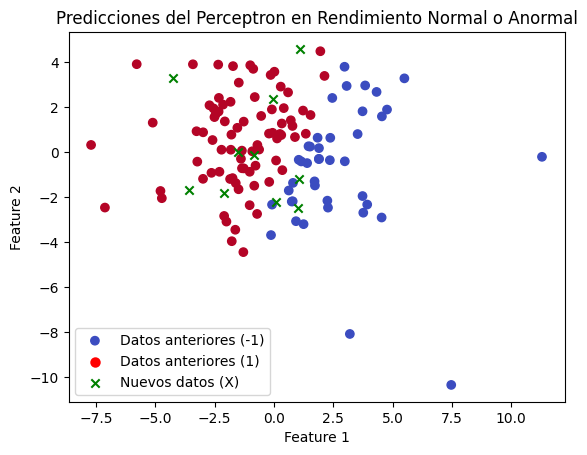

Predicciones en nuevos datos: [ 1  1  1 -1  1  1 -1 -1  1  1]


In [70]:
#We create new data, using a random function for the prediction section.

np.random.seed(2)
random_new = 10
new_data = np.random.randn(random_new, 2) * 2

more_new_data = np.array(new_data)

# Predecir con el perceptrón entrenado solo en los nuevos datos
predictions_more_new = perceptron.predict(more_new_data)

# Visualizar las predicciones en los nuevos datos y marcarlos con 'X'
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', label='Datos anteriores (-1)')
plt.scatter([], [], color='red', label='Datos anteriores (1)', edgecolors='red', linewidths=1.5)
plt.scatter(more_new_data[:, 0], more_new_data[:, 1], marker='x', c='green', label='Nuevos datos (X)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Predicciones del Perceptron en Rendimiento Normal o Anormal')
plt.show()

print("Predicciones en nuevos datos:", predictions_more_new)


#### Pseudocode of creation and training 

1. Crear una instancia del perceptrón: `perceptron = Perceptron()`.
2. Entrenar el perceptrón con los datos `X` y etiquetas `y`: `perceptron.fit(X, y)`.

3. Establecer una semilla aleatoria para generar nuevos datos: `np.random.seed(2)`.
4. Generar un número `random_new` de nuevos datos: `random_new = 10`.
5. Generar nuevos datos normalmente distribuidos y multiplicados por 2, almacenarlos en `new_data`.
6. Crear una copia de los nuevos datos: `more_new_data = np.array(new_data)`.

7. Realizar predicciones en los nuevos datos utilizando el perceptrón entrenado: `predictions_more_new = perceptron.predict(more_new_data)`.

8. Visualizar las predicciones en los nuevos datos y marcarlos con una 'X':
   - Mostrar los datos anteriores con etiqueta -1 en un color fresco (`cmap='coolwarm'`).
   - Mostrar los datos anteriores con etiqueta 1 en rojo.
   - Mostrar los nuevos datos con etiqueta 'X' en verde.
   - Etiquetar ejes, mostrar leyendas y dar un título al gráfico.
   - Mostrar el gráfico.

9. Imprimir las predicciones en los nuevos datos: `print("Predicciones en nuevos datos:", predictions_more_new)`.


### Loss Function 

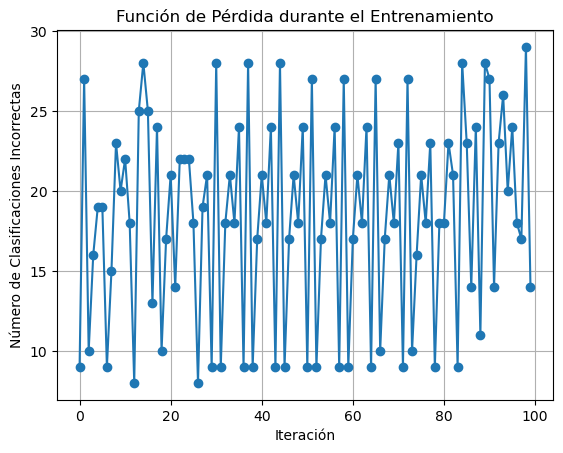

Predicciones en nuevos datos: [-1  1 -1  1 -1 -1 -1 -1 -1 -1]


In [6]:
# Graficar la función de pérdida y la optimización
plt.figure()
plt.plot(losses, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Número de Clasificaciones Incorrectas')
plt.title('Función de Pérdida durante el Entrenamiento')
plt.grid(True)
plt.show()

# Imprimir las predicciones en los nuevos datos
predictions_more_new = perceptron.predict(more_new_data)
print("Predicciones en nuevos datos:", predictions_more_new)


1. The loss function graph proyect how the loss function changes as the perceptron is training.
2. Each point represents the number of incorrect classification in one interation. 
3. The train objective is to reduce the number of wrong classifications, this reflects the improvement of the perceptron capacity to classify the new data. 

### Optimization 

The primary objective of El Perceptrón, a basic linear model, is to identify the hyperplane of separation between classes. Unlike previous models, this one does not have an intricate loss function or iterative parameter optimization.